IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME07: algorithmes d'apprentissage non-supervisé

L'objectif de ce TP est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 8), en particulier, l'algorithme de classification hiérarchique.

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Ahmed SAOUDAT Yahiathen ABBACHE*

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

**[Q]** Montrer que la distance de Manhattan est bien une mesure de distance.

**[Q]** Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.


**[Q]** En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.




## Préparation

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles :

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage "base-2D.csv" qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un <code>DataFrame</code> que vous avez appris à manipuler dans les TP précédent.

In [13]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

('Il y a', 14, 'exemples dans la base.')


Une fois chargée, on peut afficher le contenu de la base d'apprentissage :

In [14]:
data_2D.head(-1)

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0
5,4.0,4.0
6,4.0,5.0
7,4.0,6.0
8,4.5,1.0
9,4.5,6.0


**[Q]** Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


[[ 0.   4. ]
 [ 1.   3.5]
 [ 1.   1. ]
 [ 2.   1. ]
 [ 2.   2. ]
 [ 4.   4. ]
 [ 4.   5. ]
 [ 4.   6. ]
 [ 4.5  1. ]
 [ 4.5  6. ]
 [ 5.   1. ]
 [ 5.   5. ]
 [ 6.   2. ]
 [ 7.   4. ]]


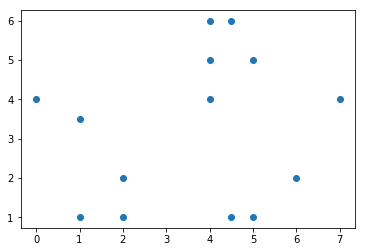

In [15]:
M_data2D= data_2D.as_matrix()  
# conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points
print M_data2D

*Rappel*: la librairie <code>pandas</code> permet de connaître le minimum et le maximum d'un <code>DataFrame</code>, par exemple:


In [16]:
# data_2D est le DataFrame dans lequel le fichier "base-2D.csv" a été chargé
for e in data_2D.columns:
    print("colonne", e, ":", data_2D[e].min(), data_2D[e].max())


('colonne', 'X', ':', 0.0, 7.0)
('colonne', 'Y', ':', 1.0, 6.0)


## Fonctions préliminaires

### Normalisation des données

**[Q]** Ecrire la fonction <code>normalisation()</code> qui prend en argument un <code>DataFrame</code> et rend la matrice obtenue en normalisant chaque colonne de ce <code>DataFrame</code> en appliquant la normalisation vue en cours.


In [ ]:
def normalisation(df):
    matrice = df.as_matrix();#recup matrice
    for i in range(len(matrice[0])):
        c_min = matrice[:,i].min()
        c_max = matrice[:,i].max() 
        matrice[:,i] = (matrice[:,i] - c_min) / (c_max - c_min)
#     for c in df.columns:
#         col_min = df[c].min()
#         col_max = df[c].max()
        
    
    return matrice 

**[Q]** Une fois la fonction de normalisation écrite, normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

In [ ]:
M_data2D_norm = normalisation(data_2D)
plt.scatter(M_data2D_norm[:,0], M_data2D_norm[:,1])
plt.show()

### Distances entre exemples

**[Q]** Ecrire la fonction <code>dist_euclidienne_vect()</code> qui prend en argument deux exemples et rend leur distance euclidienne. 

In [46]:
import math
def dist_euclidienne_vect(a, b):
    somme = 0
    if isinstance(a, list):
        dim = len(a)

        for i in range(dim):
            somme += (a[i] - b[i])*(a[i] - b[i])
        print somme
        return math.sqrt(somme)
    return np.sqrt(np.power(a, 2) + np.power(b, 2))
    
dist_euclidienne_vect([0, 0], [5, 5])

50


7.0710678118654755

In [47]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

('v1 : ', array([ 0. ,  0.6]), '\nv2 : ', array([ 0.14285714,  0.5       ]))
('distance euclidienne entre v1 et v2 : ', array([ 0.14285714,  0.78102497]))


**[Q]** Ecrire la fonction <code>dist_manhattan_vect()</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [48]:
def dist_manhattan_vect(a, b):
    dim = len(a)
    dist = 0
    for i in range(dim):
        dist += abs(a[i] - b[i])
    return dist

In [49]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

('v1 : ', array([ 0. ,  0.6]), '\nv2 : ', array([ 0.14285714,  0.5       ]))
('distance de Manhattan entre v1 et v2 : ', 0.24285714285714283)


**[Q]** Ecrire la fonction <code>dist_vect()</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [50]:
def dist_vect(type_dist, v1, v2):
    if type_dist == "euclidienne":
        return dist_euclidienne_vect(v1, v2)
    return dist_manhattan_vect(v1, v2)

In [51]:
v1= M_data2D[0,:]
v2= M_data2D[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


('v1 : ', array([ 0. ,  0.6]), '\nv2 : ', array([ 0.14285714,  0.5       ]))
('distance ', 'euclidienne', ' entre v1 et v2 :\t', array([ 0.14285714,  0.78102497]))
('distance ', 'manhattan', ' entre v1 et v2 :\t', 0.24285714285714283)


### Calcul de centroides

**[Q]** Ecrire la fonction <code>centroide()</code> qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fait l'hypothèse que la matrice contient toujours au moins un exemple.

In [52]:
def centroide(matrice):
    mean = np.array([])
    if len(np.shape(matrice)) > 1:
#         print "centroide", len(np.shape(matrice))
#         for c in range(np.shape(matrice)[1]):
        for c in range(len(matrice[0])):
#             print matrice
            col = matrice[:, c]
#             print col
#             np.mean(col)
            mean = np.append(mean,np.mean(col))
#             print mean
        return mean
    return matrice#np.mean(matrice)

In [53]:
M_data2D

array([[ 0.        ,  0.6       ],
       [ 0.14285714,  0.5       ],
       [ 0.14285714,  0.        ],
       [ 0.28571429,  0.        ],
       [ 0.28571429,  0.2       ],
       [ 0.57142857,  0.6       ],
       [ 0.57142857,  0.8       ],
       [ 0.57142857,  1.        ],
       [ 0.64285714,  0.        ],
       [ 0.64285714,  1.        ],
       [ 0.71428571,  0.        ],
       [ 0.71428571,  0.8       ],
       [ 0.85714286,  0.2       ],
       [ 1.        ,  0.6       ]])

In [54]:
centroide(M_data2D)

array([ 0.51020408,  0.45      ])

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche de type "centroid linkage" vue en cours).

**[Q]** Ecrire la fonction <code>dist_groupes()</code> qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.


In [55]:
def dist_groupes(type_dist, g1, g2):
    c1 = centroide(g1)
    c2 = centroide(g2)
    return dist_vect(type_dist, c1, c2)

In [56]:
# par exemple :
dist_groupes("euclidienne", M_data2D[0:4], M_data2D[5:13])

array([ 0.6759819 ,  0.61491869])

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


**[Q]** Ecrire la fonction <code>initialise()</code> qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrées que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [57]:
def initialise(matrice):
    n = len(matrice)
    dico = dict()
    for i in range(n):
        dico[i] = matrice[i]
    return dico

In [58]:
# Par exemple:
depart = initialise(M_data2D)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

{0: array([ 0. ,  0.6]),
 1: array([ 0.14285714,  0.5       ]),
 2: array([ 0.14285714,  0.        ]),
 3: array([ 0.28571429,  0.        ]),
 4: array([ 0.28571429,  0.2       ]),
 5: array([ 0.57142857,  0.6       ]),
 6: array([ 0.57142857,  0.8       ]),
 7: array([ 0.57142857,  1.        ]),
 8: array([ 0.64285714,  0.        ]),
 9: array([ 0.64285714,  1.        ]),
 10: array([ 0.71428571,  0.        ]),
 11: array([ 0.71428571,  0.8       ]),
 12: array([ 0.85714286,  0.2       ]),
 13: array([ 1. ,  0.6])}

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (c'est-à-dire que la distance entre 2 groupes d'exemples est la distance entre leurs centroides, c'est l'approche "centroid linkage" vue en cours).

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour ne former qu'un unique groupe et ils sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

**[Q]** Ecrire la fonction <code>fusionne()</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [59]:
def compare(e1, e2):
    if np.shape(e1) == np.shape(e2):
        return e1 == e2
    return False

def fusionne(type_dist, C0):
    if len(C0) < 2:
        return []
    C1 = dict()
    keys = [k for k in C0.keys()]
#     d_min par default: première valeur 
    d_min = dist_vect(type_dist, C0[keys[0]], C0[keys[1]])
    print centroide(d_min)
    k1, k2 = keys[0], keys[1]
    
    #     recup distance minimale
    for i in keys:
        for j in keys[i+1:]:
            d = dist_groupes(type_dist, C0[i], C0[j])
            if d < d_min:
                d_min = d
                k1 = i
                k2 = j
                print d_min
    #mettre dans C1 les elements de C0 differents de k1 et k2
    for k, v in C0.items():
        if compare(k, k1) or compare(k, k2):
            continue
        else:
            C1[k] = v
   
    # fusionner k1 et k2 sous la cle kn: cle dico pas tuple ni tableau
    kn = np.max(keys)+1
    C1[kn] = np.vstack(([C0[k1], C0[k2]]))#centroide(np.array([C0[k1], C0[k2]]))
    print "Fusion de ", k1," et ", k2, " pour une distance de ", centroide(d_min)
    return C1, k1, k2, d_min

In [60]:
##### Par exemple:
depart = initialise(M_data2D)
fusionne("euclidienne",depart)
# new, k1, k2, d = fusionne("euclidienne",depart)  
# while len(new)>1:
# #     print k1, k2
# #     print new.keys(), "\n"
#     new, k1, k2,d = fusionne("euclidienne", new)
# print new
# [np.array([4, 5])]


[ 0.14285714  0.78102497]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [61]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(M_data2D)       # clustering courant, au départ:s données data_2D normalisées
new,k1,k2,dist_min = fusionne("euclidienne", courant)
# print len(courant)
M_Fusion = []                        # initialisation
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
#     print k1, k2,dist_min
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
#     print len(new)
# M_Fusion = np.matrix(M_Fusion)
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)
# print scipy.cluster.hierarchy.linkage(M_data2D)

[ 0.14285714  0.78102497]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

ValueError: Linkage 'Z' uses non-singleton cluster before it is formed.

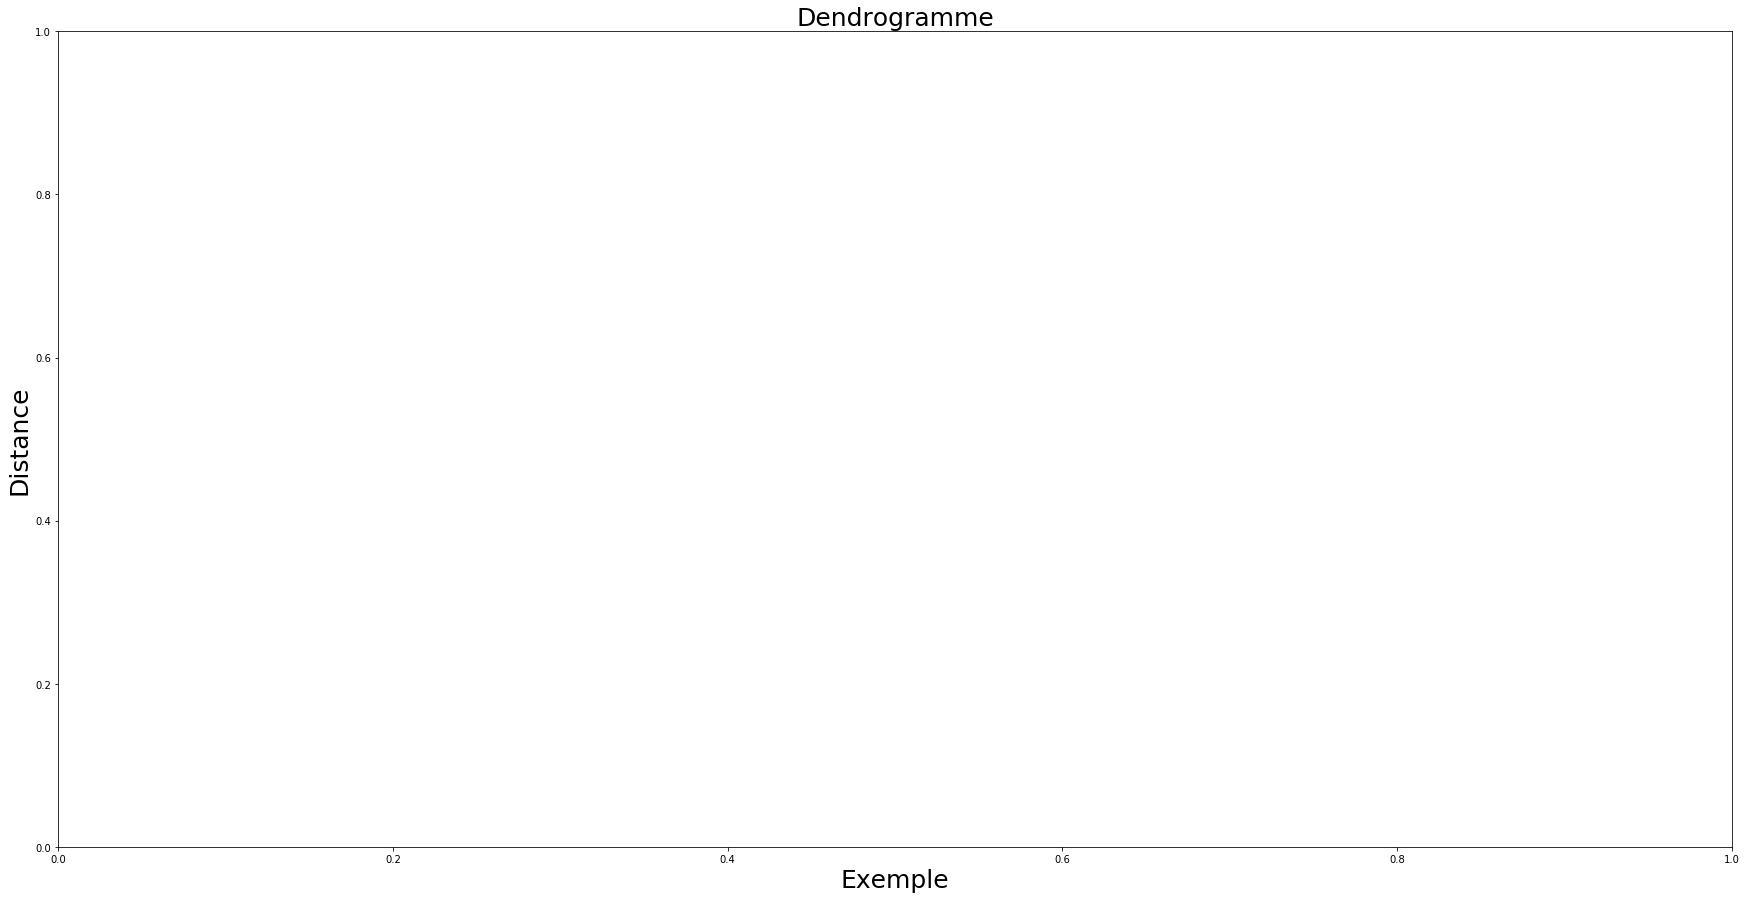

In [62]:
import scipy.cluster.hierarchy
def afficher_dendogramme(matrice):
    # Paramètre de la fenêtre d'affichage: 
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        matrice,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )

    # Affichage du résultat obtenu:
    plt.show()

afficher_dendogramme(M_Fusion)

**[Q]** Ecrire la fonction <code>clustering_hierarchique()</code> qui, pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

In [ ]:
# --------------------------------------------------------
# Rem: pour info, on pourrait obtenir la matrice M_fusion avec scipy:

# import scipy.cluster.hierarchy
# scipy.cluster.hierarchy.linkage(M_data2D)

# mais on ne l'utilisera pas ici.
# --------------------------------------------------------

def clustering_hierarchique(data, type_dist):
#     print data
    # initialisation 
    courant = initialise(data)       # clustering courant, au départ:s données data normalisées
    new,k1,k2,dist_min = fusionne(type_dist, courant)
    
    mat_fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne(type_dist,courant)
        if(len(mat_fusion)==0):
            mat_fusion = [k1,k2,dist_min,2]
        else:
            mat_fusion = np.vstack( [mat_fusion,[k1,k2,dist_min,2] ])
        courant = new
    
    #affichage dendogramme
    afficher_dendogramme(mat_fusion)
    
    return mat_fusion

In [63]:
clustering_hierarchique(M_data2D, "euclidienne")

NameError: name 'clustering_hierarchique' is not defined

### Comparaison de distances

**[Q]** Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance euclidienne.

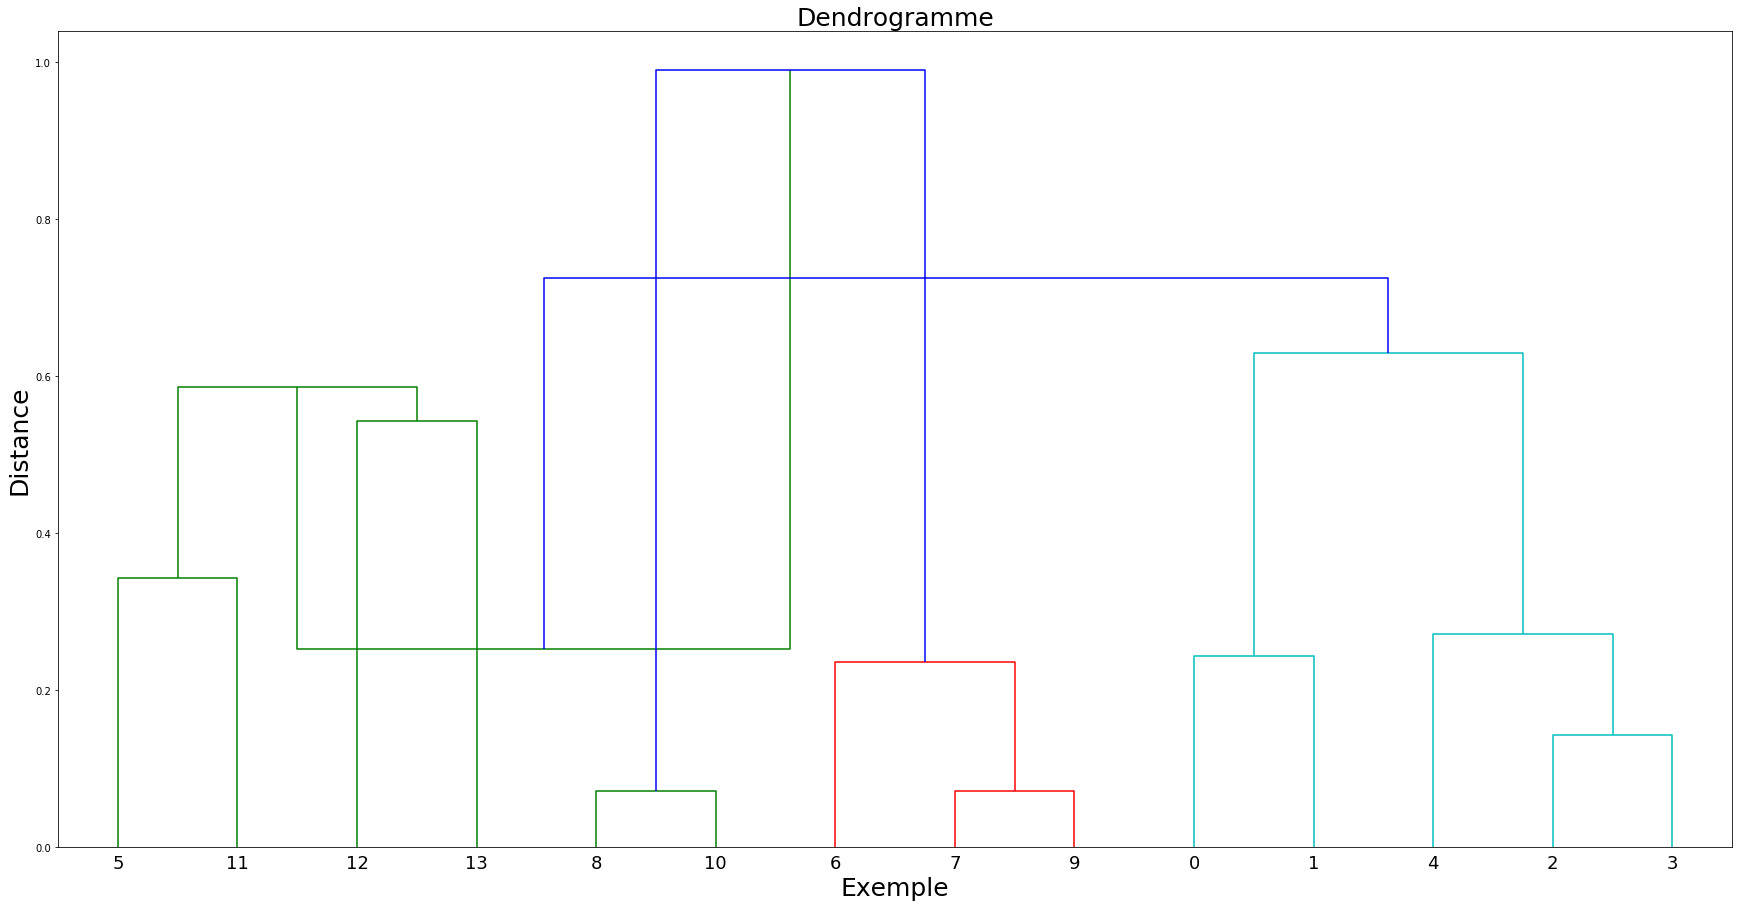

array([[  8.        ,  10.        ,   0.07142857,   2.        ],
       [  7.        ,   9.        ,   0.07142857,   2.        ],
       [  2.        ,   3.        ,   0.14285714,   2.        ],
       [  6.        ,  15.        ,   0.23571429,   2.        ],
       [  0.        ,   1.        ,   0.24285714,   2.        ],
       [  4.        ,  16.        ,   0.27142857,   2.        ],
       [  5.        ,  11.        ,   0.34285714,   2.        ],
       [ 12.        ,  13.        ,   0.54285714,   2.        ],
       [ 14.        ,  17.        ,   0.98928571,   2.        ],
       [ 18.        ,  19.        ,   0.62857143,   2.        ],
       [ 20.        ,  21.        ,   0.58571429,   2.        ],
       [ 24.        ,  22.        ,   0.25178571,   2.        ],
       [ 25.        ,  23.        ,   0.72410714,   2.        ]])

In [164]:
clustering_hierarchique(M_data2D, "manhattan")

Le dendogramme possède la même allure que ce soit avec des distances euclidiennes ou de Manhattan.

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage" vue en cours. Dans cette approche, la distance entre deux clusters G1 et G2 est égale à la plus grande distance existante entre un exemple de G1 et un exemple de G2.

**[Q]** Ecrire la fonction <code>dist_max_groupes()</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [184]:
def dist_max_groupes(type_dist, G1, G2):
    #centroide de chaque cluster
    c_g1 = centroide(G1)
    c_g2 = centroide(G2)
    
    # les extremes de chaque cluster relativement a l'autre
    max_g1 = G1[0]
    max_g2 = G2[0]

    #max de G1
    for g in G1:
        if dist_vect(type_dist, g, c_g2) > dist_vect(type_dist, max_g1, c_g2):
            max_g1 = g
    #max de G2
    for g in G2:
        if dist_vect(type_dist, g, c_g1) > dist_vect(type_dist,max_g2, c_g1):
            max_g2 = g
    return dist_vect(type_dist, max_g1, max_g2)

In [185]:
dist_max_groupes("euclidienne", M_data2D[0:5], M_data2D[6:13])

1.1180339887498949

La distance <code>dist_max_groupes()</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet ("complete linkage") entre les clusters (cf. cours).

**[Q]** Implémenter une variante du clustering hiérarchique qui utilise cette distance.

In [186]:
def fusionne_max(type_dist, C0):
    if len(C0) < 2:
        return []
    C1 = dict()
    keys = [k for k in C0.keys()]
#     d_min par default: première valeur 
    d_min = dist_vect(type_dist, C0[keys[0]], C0[keys[1]])
    k1, k2 = keys[0], keys[1]
    
    #     recup distance minimale
    for i in keys:
        for j in keys[i+1:]:
            d = dist_max_groupes(type_dist, C0[i], C0[j])
            if d < d_min:
                d_min = d
                k1 = i
                k2 = j
    #mettre dans C1 les elements de C0 differents de k1 et k2
    for k, v in C0.items():
        if compare(k, k1) or compare(k, k2):
            continue
        else:
            C1[k] = v
   
    kn = np.max(keys)+1
    C1[kn] = centroide(np.array([C0[k1], C0[k2]]))
   
    return C1, k1, k2, d_min

def clustering_hierarchique_max(data, type_dist):
    courant = initialise(data)       # clustering courant, au départ:s données data normalisées
    new,k1,k2,dist_min = fusionne_max(type_dist, courant)
    
    mat_fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne_max(type_dist,courant)
        if(len(mat_fusion)==0):
            mat_fusion = [k1,k2,dist_min,2]
        else:
            mat_fusion = np.vstack( [mat_fusion,[k1,k2,dist_min,2] ])
        courant = new
    
    #affichage dendogramme
    afficher_dendogramme(mat_fusion)
    
    return mat_fusion

In [187]:
clustering_hierarchique_max(M_data2D, 'manhattan')

TypeError: object of type 'numpy.float64' has no len()

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

**[Q]** Etudier cette base et les clusters qui peuvent être mis en évidence.





In [29]:
data_Paris = pd.read_csv("data/base-Paris.csv")

In [30]:
data_Paris.head(-1)

,Granularité,janv-11,févr-11,mars-11,avr-11,mai-11,juin-11,juil-11,août-11,sept-11,oct-11,nov-11,déc-11,Total arrondissement 2011
0,75007,288.1,249.1,303.7,255.8,287.8,288.4,249.6,185.6,281.3,284.3,296.4,301.1,NaN
1,75013,596.5,540.2,618.5,558.6,595.9,581.7,539.2,490.5,597.8,575.7,580.5,601.4,NaN
2,75014,464,404.9,465.3,420.2,405.3,446,412.9,348.7,449.3,446.3,453.1,484.3,NaN
3,75015,903.1,801.4,937.5,835.5,876.8,888.6,628.8,674.8,913.3,878.7,895.7,935.8,NaN
4,75017,451.1,412.4,491.6,422.7,363.6,446.4,409.5,332.3,416.4,451.5,475.1,513.5,NaN
5,75018,427,394.3,455.2,419.9,458.3,456.6,418,361.8,464.6,453.4,478.5,470.9,NaN
6,75019,323.4,287.3,350.3,317.8,336.9,340.7,311.6,281,345.6,335.6,367,354.5,NaN
7,75002,153,125.8,136.6,126.6,133.2,127.6,126.7,114.3,144.3,145.1,129.5,129.8,NaN
8,75004,116.3,115.7,133.4,115,123.2,120.5,114.5,97.6,130.5,123,124.3,133.7,NaN
9,75008,252.6,246.7,252.9,232.5,199.4,236.4,175.4,189.4,266.6,230.3,257.7,224.4,NaN


**[Q]** Préparer un rapport d'analyse (c'est-à-dire, compléter cette page ipython en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.
